<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Luis Miguel Olalla Chuque <br>
Fecha: 17/07/2022

# Importación de librerias necesarias

In [36]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
#Importar liberia numpy
import numpy as np
#importamos libreria de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#liberia para realizar funciones metricas
from sklearn import metrics
#Libreria para realizar regresion lineal
from sklearn.linear_model import LinearRegression 
#Libreria para realizar graficos estadisticos
import matplotlib.pyplot as plt
#Liberia para el LabelEncoding
from sklearn.preprocessing import LabelEncoder

## Cargar el Dataset

In [37]:

#Código para cargar el Dataset
fish=pd.read_csv('Fish.csv')

In [38]:
#crear dataframe para realizar operaciones aritméticas
df =pd.DataFrame(fish)

In [39]:

#Los 10 primeros registros del dataset
df.head(10)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [40]:
#Label Encoding para transformar el atributo de species
encoder = LabelEncoder()

In [41]:
#Tranformar la variable species
fish["Species"] = encoder.fit_transform(fish["Species"])

In [42]:
#desplegar la descripción del dataset
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [44]:
#Ver los 10 registros con la variable species transformada
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
5,0,450.0,26.8,29.7,34.7,13.6024,4.9274
6,0,500.0,26.8,29.7,34.5,14.1795,5.2785
7,0,390.0,27.6,30.0,35.0,12.6700,4.6900
8,0,450.0,27.6,30.0,35.1,14.0049,4.8438
9,0,500.0,28.5,30.7,36.2,14.2266,4.9594


## Descripción de la fuente del Dataset

El dataset presentado tiene 159 registros de tipos de peces para la venta en el mercado. El dataset cuenta con 6 columnas o atributos de los cuales se tiene como variable objetivo el peso de los peces **(weight)**. Y como variables de entrada se tienen las siguientes:

**Variables independientes o variables de entrada X**

**Species:** Variable Categórica, Nombre de cada especie a la que pertenecen los peces.

**Length1:** Variable Continua, Longitud vertical en centímetros del pescado.

**Length2:** Variable Continua, Longitud diagonal en centímetros del pescado.

**Length3:** Variable Continua, Longitud de la cruz en centímetros del pescado.

**Height:** Variable Continua, Altura en centímetros del pescado.

**Width:** Variable Continua, Anchura diagonal en centímetros del pescado.


**Variable dependiente o variable objetivo Y**

**Weight:** Variable Continua, Peso en gramos de cada uno de los pescados.

## Explique el problema a resolver. 

Se pretende realizar un modelo de predicción en donde se requiere estimar a los peces con mejor peso. Se hará uso del dataset Fish el cual contiene 159 samples de cada atributo. Se tiene a la variable objetivo Weight y las variables de entrada que se van a utilizar en el proceso de regresión.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


**Número de instancias en total.**


In [6]:
#Contrar los registros de los peces del dataset
df.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

**Número de atributos de entrada, su significado y tipo.**

**Species:** Variable Categórica, Nombre de cada especie a la que pertenecen los peces.

**Length1:** Variable Continua, Longitud vertical en centímetros del pescado.

**Length2:** Variable Continua, Longitud diagonal en centímetros del pescado.

**Length3:** Variable Continua, Longitud de la cruz en centímetros del pescado.

**Height:** Variable Continua, Altura en centímetros del pescado.

**Width:** Variable Continua, Anchura diagonal en centímetros del pescado.

In [14]:
#Información relevante acerca del dataset
df.drop('Weight', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


**Estadísticas de la variable objetivo**

<AxesSubplot:>

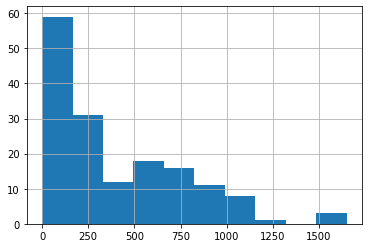

In [16]:
#Habilitar el trazado de linea
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['Weight'].hist()

Observamos que la variable de peso de los peces (weight) es adecuada porque contiene una curva y esta ligeramente sesgada a la derecha y tiene valores de los que pueden aprender.  

### Análisis exploratorio de datos

>- Variables categóricas: gráfico de barras
>- Variables continuas: Histograma

#### Visualización la distribución de todas las variables de entrada categóricas mediante diagramas de barras

In [45]:
#Vamos a observar los atribbutos que tienen nulos e identificar a los categoricos
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

Podemos observar que tenemos una sola variable categórica la cual es Species, esto lo deducimos porque realizamos un cambio mediante LabelEncoding. Además podemos deducir que una variable categorica tiene valores muy bajos.  

In [53]:
#Plotting de múltiples gráficos de barras a la vez para variables categóricas.
#Dado que no existe una función predeterminada que pueda trazar gráficos de barras para varias columnas a la vez, 
#estamos definiendo nuestra propia función para la misma.
def PlotBarCharts(inpData, colsToPlot):
    
    '''
    Método para realizar gráficos de barras de varios datos.
    '''
    #Establece el trazado de linea
    %matplotlib inline
    #Libreria para realizar el gráfico
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    #Titulo o leyenda para el gráfico
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    #Grafico escalado de barras
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

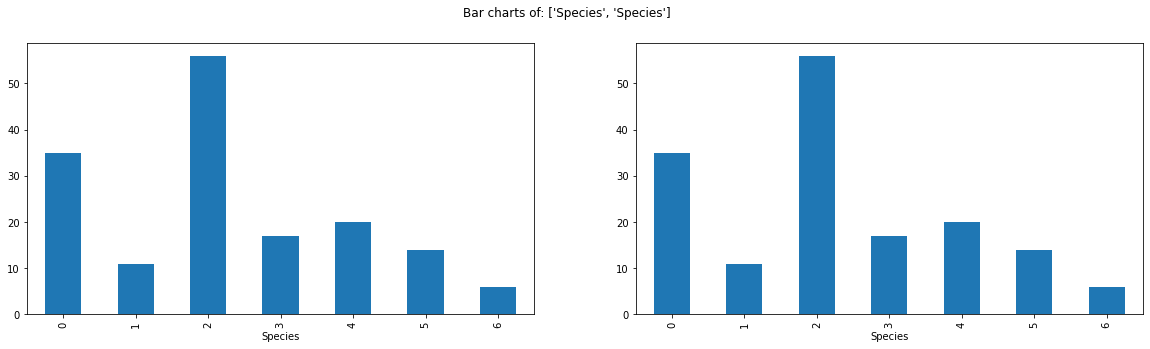

In [57]:
#Funcion para graficar
PlotBarCharts(inpData=df, colsToPlot=['Species', 'Species'])

# Interpretación:
Como tenemos solo una variable categórica, al momento de comparar se requiere de dos variables categóricas. Repetimos la variable para poder comparar correctamente y observamos las 7 barras de cada especie de peces. 


### Visualizar la distribución de todas las variables continuas usando histogramas

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length1'}>]], dtype=object)

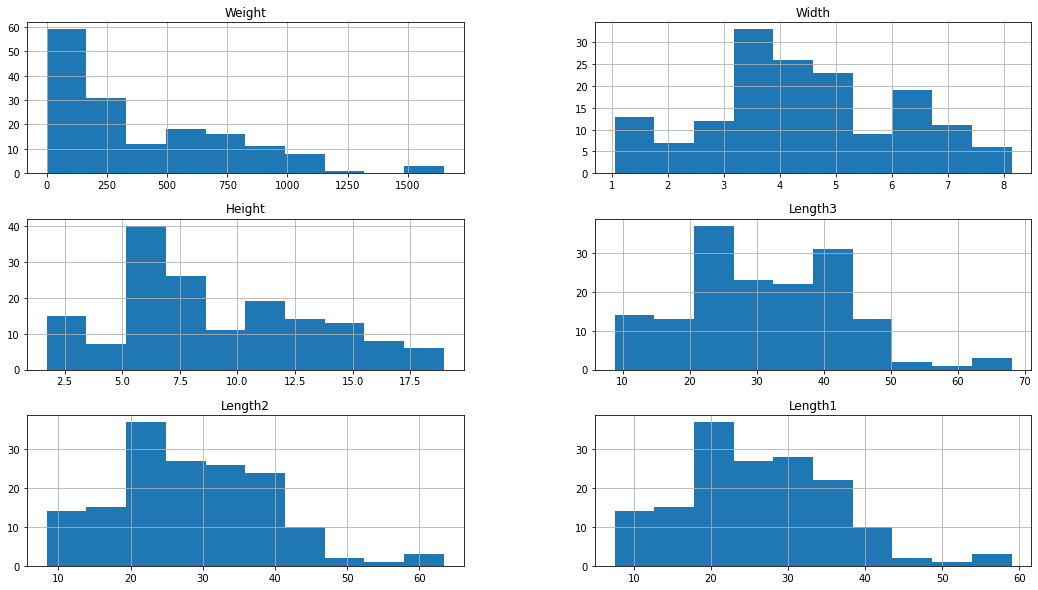

In [59]:
# Plotting histogramas de múltiples columnas juntas
df.hist(['Weight','Width','Height','Length3','Length2','Length1'], figsize=(18,10))

**Interpretación:**

El eje X muestra el rango de valores y el eje Y representa el número de valores en ese rango. Por ejemplo, en el histograma anterior de 'Weight' tiene de 60 filas.

Deducimos que los histogramas tienen cierta similitud ya que se asemejan en sus valores de filas.


Variables continuas seleccionadas:

     Weight: Seleccionado. La distribución es buena.
     Width: Seleccionado. La distribución es buena.
     Height: Seleccionado. La distribución es buena.
     Length3: Seleccionado. La distribución es buena. 
     Length2: Seleccionado. La distribución es buena. 
     Length1: Seleccionado. La distribución es buena. 



### Exploración de relaciones: Continuo Vs Continuo -- Scatter Charts (Gráficos de dispersión)

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [4]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)


## División del dataset en datos de entrenamiento y datos de test 

In [5]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Regresión Lineal

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 